In [8]:
import pandas as pd
import numpy as np
import datetime
import tqdm
import os
from tqdm import tqdm
from utils.universe_selection import *
import matplotlib.pyplot as plt

In [9]:
### function to get SP500 tickers at certain date
get_index_components_at(when = '2020-01-04')

[DEBUG]-Resetting dropped connection: en.wikipedia.org
[DEBUG]-https://en.wikipedia.org:443 "GET /w/api.php?action=query&prop=revisions&titles=List+of+S%26P+500+companies&rvprop=ids%7Ctimestamp%7Cuser%7Ccomment&rvslots=main&formatversion=2&format=json&rvlimit=1&rvdir=older&rvstart=2020-01-04T00%3A00%3A00 HTTP/1.1" 200 361


,Presence
Ticker,
MMM,True
ABT,True
ABBV,True
ABMD,True
ACN,True
...,...
YUM,True
ZBRA,True
ZBH,True


In [10]:
### get SP500 components between two dates
historical_components = get_index_components_history(start_date='2021-01-01',end_date='2021-01-10')
historical_components

100%|██████████| 6/6 [00:14<00:00,  2.37s/it]


{'2021-01-01 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True
 ...          ...
 YUM         True
 ZBRA        True
 ZBH         True
 ZION        True
 ZTS         True
 
 [505 rows x 1 columns],
 '2021-01-04 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True
 ...          ...
 YUM         True
 ZBRA        True
 ZBH         True
 ZION        True
 ZTS         True
 
 [505 rows x 1 columns],
 '2021-01-05 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True
 ...          ...
 YUM         True
 ZBRA        True
 ZBH         True
 ZION        True
 ZTS         True
 
 [505 rows x 1 columns],
 '2021-01-06 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True

In [11]:
### aggregate to form presence_matrix
P = pd.concat(historical_components)
P = P['Presence'].unstack()
P.index = pd.to_datetime(P.index).date
P.sample(5)


Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2021-01-05,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-07,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-01,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-04,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [12]:
### save presence matrix
from utils.func import write_to_parquet
write_to_parquet(P,'US','test_Presence')

data to parquet done --> data/US/test_Presence.pq


  0%|          | 0/2 [00:00<?, ?it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AAPL.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 200 None
[DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/eod/AAPL.US?api_token=640aa99a271902.64352462&fmt=json&from=2008-01-01&to=2023-05-16 HTTP/1.1" 200 None
[INFO]-successful get_ohlcv but not inserted AAPL
[DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/historical-market-cap/AAPL.US?api_token=640aa99a271902.64352462&from=2000-01-01 HTTP/1.1" 200 None
 50%|█████     | 1/2 [00:01<00:01,  1.72s/it][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/MSFT.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 200 None
[DE

data to parquet done --> data/US/test_mkt_data.pq


<Axes: title={'center': 'MSFT close'}, xlabel='Date'>

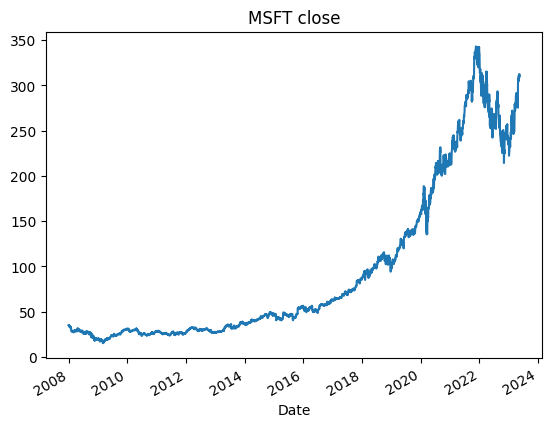

In [14]:
### aggregate market_data
from utils.func import aggregate_market_data
tickers = ['AAPL','MSFT']
mkt_data = aggregate_market_data(tickers,datetime.date(2008,1,1))
write_to_parquet(mkt_data,'US','test_mkt_data')
mkt_data.xs('MSFT',level=1)['close'].plot(title='MSFT close')

In [15]:
### aggregate balance_sheet
from utils.func import aggregate_tickers_balance_sheet
tickers = ['AAPL','MSFT']
balance_sheet = aggregate_tickers_balance_sheet(tickers)
write_to_parquet(balance_sheet,'US','test_balance_sheet')
print(balance_sheet.sample(5))

  0%|          | 0/2 [00:00<?, ?it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AAPL.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 200 None
 50%|█████     | 1/2 [00:00<00:00,  1.14it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/MSFT.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 200 None
100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

data to parquet done --> data/US/test_balance_sheet.pq
                         date filing_date currency_symbol      totalAssets  \
Date       Ticker                                                            
2013-12-31 MSFT    2013-12-31  2014-01-23             USD  153543000000.00   
2017-09-30 AAPL    2017-09-30  2017-11-03             USD  375319000000.00   
2000-09-30 AAPL    2000-09-30  2000-12-14             USD    6803000000.00   
2013-09-30 MSFT    2013-09-30  2013-10-24             USD  142348000000.00   
2015-12-31 AAPL    2015-12-31  2016-01-27             USD  293284000000.00   

                  intangibleAssets earningAssets otherCurrentAssets  \
Date       Ticker                                                     
2013-12-31 MSFT      2945000000.00          None      5346000000.00   
2017-09-30 AAPL      2298000000.00          None     13936000000.00   
2000-09-30 AAPL               None          None       252000000.00   
2013-09-30 MSFT      2982000000.00         